In [1]:
import tensorflow as tf
import numpy as np

In [2]:
input = np.loadtxt('/content/filtro.csv', delimiter=',', usecols=(0,1), dtype=float)
output = np.loadtxt('/content/filtro.csv', delimiter=',', usecols=(2), dtype=float)

In [3]:
print(input)
print(output)

[[0.00215112 0.25231481]
 [0.00215112 0.26388889]
 [0.00215112 0.26388889]
 ...
 [0.84834633 0.60416667]
 [0.84861522 0.60185185]
 [0.9131487  0.27777778]]
[0.00181488 0.00181488 0.00181488 ... 0.87023593 0.87023593 0.89927405]


In [4]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=1000, input_shape=[2])
oculta2 = tf.keras.layers.Dense(units=1000)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [5]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [6]:
print("Comenzando entrenamiento...")
historial = modelo.fit(input,output, epochs=10, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


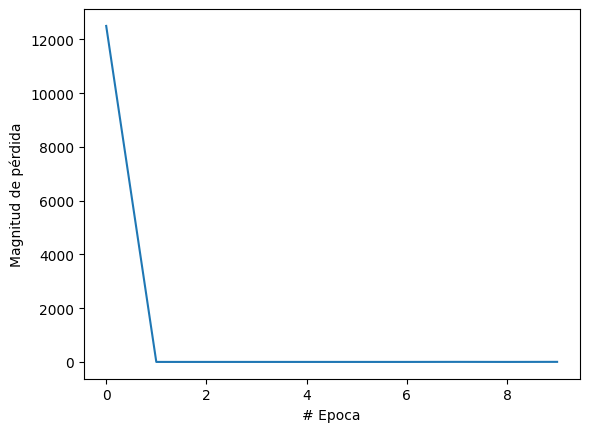

In [7]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [8]:
print("Hagamos una predicción!")
resultado = modelo.predict([[0.00480011,0.777777]])
print("El resultado es " + str(resultado))

Hagamos una predicción!
1/1 [==============================] - 0s 321ms/step
El resultado es [[-0.55821]]


In [9]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.09604748,  0.07195114,  0.0184256 , ...,  0.09674815,
        -0.02737273,  0.02157042],
       [ 0.11400155, -0.02072369, -0.02287932, ...,  0.11113931,
         0.00394518, -0.02209395]], dtype=float32), array([ 9.38075632e-02,  4.42952216e-02, -1.94503963e-02, -6.26655370e-02,
       -7.77887627e-02, -9.50347707e-02,  3.38094085e-02,  5.97615689e-02,
        6.40190067e-03,  3.14277150e-02, -2.04462782e-02,  1.00760637e-02,
        2.17862613e-02,  7.24923797e-04, -9.45123099e-03,  9.76654366e-02,
        1.87589265e-02, -9.13973674e-02,  8.94417688e-02,  9.66606289e-02,
       -9.18416381e-02, -8.78279060e-02,  4.03765449e-03,  3.78291421e-02,
       -2.01452654e-02, -4.20299470e-02,  9.38014463e-02,  1.27930788e-03,
        7.06333742e-02,  5.51676080e-02, -6.61824420e-02,  5.83389252e-02,
       -2.24774498e-02,  6.51917141e-03, -3.00158933e-02,  7.92081878e-02,
       -9.21460912e-02,  3.63668264e-03,  7.44865760e-02,  5.58146182e-03,
  